This example was taken from the book **The Essence of Chaos** by *Edward Lorenz*. 

$$\frac{dX}{dt} = U, \ \frac{dY}{dt} = V, \ \frac{dZ}{dt} = W.$$

\begin{align}
\frac{dU}{dt} &= -F \partial_x H - cU, \\
\frac{dV}{dt} &= -F \partial_y H - cV, \\
\frac{dW}{dt} &= -g + F - cW.
\end{align}

and

\begin{align}
\frac{d \vec{U}}{dt} &= -F \nabla H - c \vec{U}, \\
\end{align}

$$H(x,y) = -ax - b \ cos(px) \ cos(qy)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = 0.25
b = 0.4
q = (2*np.pi)/4.0
p = (2*np.pi)/10.0

def H_test(x,y):
    return -a*x - b*np.cos(p*x)*np.cos(q*y) 

def pits_n_crests(x,y):
    return - b*np.cos(p*x)*np.cos(q*y) 

In [3]:
x_range = np.linspace(0, 20, 200)
y_range = np.linspace(-10, 10, 200)

In [4]:
XX, YY = np.meshgrid(x_range, y_range)

In [5]:
moguls = H_test(XX, YY)

In [6]:
moguls

array([[ 0.4       ,  0.37407711,  0.34656289, ..., -4.5529346 ,
        -4.57567163, -4.6       ],
       [ 0.39502582,  0.36911285,  0.34162833, ..., -4.55786916,
        -4.5806359 , -4.60497418],
       [ 0.380227  ,  0.35434352,  0.32694737, ..., -4.57255012,
        -4.59540522, -4.619773  ],
       ...,
       [ 0.380227  ,  0.35434352,  0.32694737, ..., -4.57255012,
        -4.59540522, -4.619773  ],
       [ 0.39502582,  0.36911285,  0.34162833, ..., -4.55786916,
        -4.5806359 , -4.60497418],
       [ 0.4       ,  0.37407711,  0.34656289, ..., -4.5529346 ,
        -4.57567163, -4.6       ]])

In [7]:
from mpl_toolkits.mplot3d import Axes3D

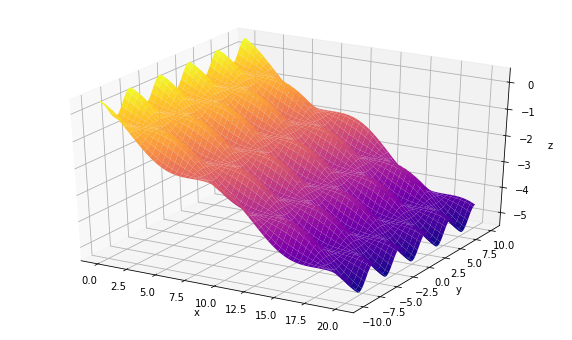

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('z')

ax.plot_surface(XX, YY, moguls, cmap = 'plasma')

In [10]:
from scipy.integrate import solve_ivp

In [11]:
def sled(t, X_0):
    
    x0 = np.copy(X_0[0])
    y0 = np.copy(X_0[1])
    u0 = np.copy(X_0[2])
    v0 = np.copy(X_0[3])
    
    g = 9.81
    c = 0.5
    a = 0.25
    b = 0.5
    p = (2*np.pi)/10.0
    q = (2*np.pi)/4.0
    
    H = -a*x0 - b*np.cos(p*x0)*np.cos(q*y0) 
    H_x = -a + b*p*np.sin(p*x0)*np.cos(q*y0)
    H_xx = b*p**2 * np.cos(p*x0)*np.cos(q*y0)
    H_y = b*q*np.cos(p*x0)*np.sin(q*y0)
    H_yy = b*q**2 * np.cos(p*x0)*np.cos(q*y0)
    H_xy = -b*q*p*np.sin(p*x0)*np.sin(q*y0)
        
    F = (g + H_xx*u0**2 + 2*H_xy*u0*v0 + H_yy*v0**2)/(1 + H_x**2 + H_y**2)
    
    dU = -F*H_x - c*u0
    dV = -F*H_y - c*v0
    
    return np.array([u0, v0, dU, dV])

In [12]:
t_f = 15

sol_1 = solve_ivp(sled, [0, t_f], [0,-0.1,4,2])
sol_2 = solve_ivp(sled, [0, t_f], [0,0.0,4,2])
sol_3 = solve_ivp(sled, [0, t_f], [0,0.1,4,2])
sol_4 = solve_ivp(sled, [0, t_f], [0,0.2,4,2])

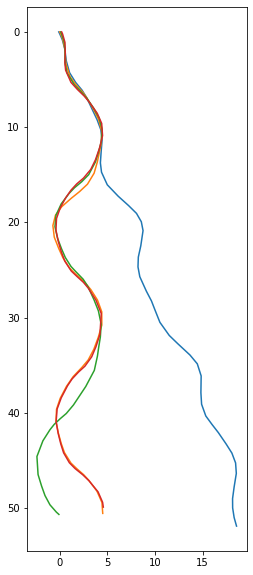

In [13]:
plt.figure(figsize=(5,10))
plt.plot(sol_1.y[1], sol_1.y[0])
plt.plot(sol_2.y[1], sol_2.y[0])
plt.plot(sol_3.y[1], sol_3.y[0])
plt.plot(sol_4.y[1], sol_4.y[0])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')

The previous system is not compact, i.e., $X$ and $Y$ can grow infinitidly. 

In [15]:
x_range_compact = np.linspace(-5, 5, 50)
y_range_compact = np.linspace(-2, 2, 50)
XX_c, YY_c = np.meshgrid(x_range_compact, y_range_compact)

In [16]:
moguls_compact = pits_n_crests(XX_c, YY_c)

Text(0, 0.5, '$x$')

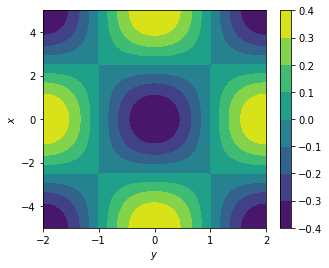

In [17]:
plt.figure(figsize=(5,4))
plt.contourf(YY_c, XX_c, moguls_compact)
plt.colorbar()
plt.xlabel(r'$y$')
plt.ylabel(r'$x$')

In [100]:
def compactor(x, lower_bound, upper_bound):
    
    if x > upper_bound: 
        return x%upper_bound - upper_bound
    elif x < lower_bound: 
        return x%lower_bound - lower_bound
    else: 
        return x

In [102]:
compactor(2.6, -2.5, 2.5)

-2.4

In [101]:
def sled_compact(t, X_0):
    
    x0 = np.copy(X_0[0])
    y0 = np.copy(X_0[1])
    u0 = np.copy(X_0[2])
    v0 = np.copy(X_0[3])
    
    x0 = compactor(x0, -2.5, 2.5)
    y0 = compactor(y0, -2, 2)
    
    g = 9.81
    c = 0.5
    a = 0.25
    b = 0.5
    p = (2*np.pi)/10.0
    q = (2*np.pi)/4.0
    
    H = -a*x0 - b*np.cos(p*x0)*np.cos(q*y0) 
    H_x = -a + b*p*np.sin(p*x0)*np.cos(q*y0)
    H_xx = b*p**2 * np.cos(p*x0)*np.cos(q*y0)
    H_y = b*q*np.cos(p*x0)*np.sin(q*y0)
    H_yy = b*q**2 * np.cos(p*x0)*np.cos(q*y0)
    H_xy = -b*q*p*np.sin(p*x0)*np.sin(q*y0)
        
    F = (g + H_xx*u0**2 + 2*H_xy*u0*v0 + H_yy*v0**2)/(1 + H_x**2 + H_y**2)
    
    dU = -F*H_x - c*u0
    dV = -F*H_y - c*v0
    
    return np.array([u0, v0, dU, dV])

In [98]:
t_f = 10

sol_1 = solve_ivp(sled, [0, t_f], [0,0,4,2], first_step=0.01)

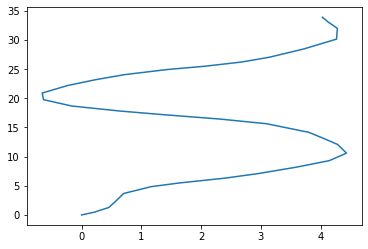

In [99]:
plt.plot(sol_1.y[1], sol_1.y[0])
